<a href="https://colab.research.google.com/github/ydchen17/phylogenetic_tree_generator/blob/main/SARS_CoV_2_phylogenetic_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install Biopython tqdm
from Bio import Entrez
from Bio import SeqIO

     |████████████████████████████████| 2.3 MB 8.6 MB/s 


In [2]:
email_address = input("Please input your email: ")
while "@" not in email_address:
  email_address = input("This is not an valid email address. Please input your email again: ")

Please input your email: ydc@zju.edu.cn


In [3]:
ncbi_API_key = input("Please input your API key if you have one, or you can leave it blank: ")

API_access = False # default to False
while len(ncbi_API_key) > 0 and len(ncbi_API_key) != 36:
  ncbi_API_key = input("There seems some problem with your key, please retry, or you can leave it blank: ")
  if len(ncbi_API_key) == 36:
    API_access = True

Please input your API key if you have one, or you can leave it blank: CHN
There seems some problem with your key, please retry, or you can leave it blank: 


In [4]:
all_terms = "Severe acute respiratory syndrome coronavirus 2 [Organism] AND complete genome"
custom_term_add = input("Do you want to add more term? Enter any term if you have any, seperating by AND: ")
all_terms = all_terms+" AND "+custom_term_add
print("Now your terms are: "+all_terms)

Do you want to add more term? Enter any term if you have any, seperating by AND: CHN
Now your terms are: Severe acute respiratory syndrome coronavirus 2 [Organism] AND complete genome AND CHN


In [5]:
Entrez.email = email_address
if API_access:
  handle = Entrez.esearch(db="nucleotide", restart = 2, term= all_terms, idtype="ACCESSION", RetMax= 1000000000)
  print("You are not using an API, which may cause lower limits of data retrival. Please read here for more detail: https://ncbiinsights.ncbi.nlm.nih.gov/2017/11/02/new-api-keys-for-the-e-utilities/")
else:
  handle = Entrez.esearch(db="nucleotide", restart = 2, term= all_terms, idtype="ACCESSION", RetMax= 1000000000, API_key = ncbi_API_key)
record = Entrez.read(handle)
virus_list = record["IdList"]
print("Now we get "+str(len(virus_list))+" pieces of records")
if "ErrorList" in record.keys():
  print("Yet, the current search has the following problems:")
  print(record["ErrorList"])

Now we get 149 pieces of records


In [6]:
# Save viral genome fasta to seperate files
!rm -rf fasta_downloads
!mkdir fasta_downloads
from tqdm import tqdm
for virus_id in tqdm(virus_list):
  filename = "fasta_downloads/"+virus_id+".fa"
  net_handle = Entrez.efetch(db="nucleotide",id=virus_id,rettype="fasta", retmode="text")
  out_handle = open(filename, "w")
  out_handle.write(net_handle.read())
  out_handle.close()
  net_handle.close()
  # print(virus_id+" saved")

100%|██████████| 149/149 [01:29<00:00,  1.67it/s]


In [7]:
!cat fasta_downloads/*.fa > all_seq.fa

In [8]:
!cat all_seq.fa | grep ">"

>MT034054.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Beijing-01/2020, complete genome
>MT039874.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/IME-HZ01/2020, complete genome
>MT049951.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Yunnan-01/2020, complete genome
>MT123290.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/IQTC01/2020, complete genome
>MT135041.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/105/2020, complete genome
>MT135042.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/231/2020, complete genome
>MT135043.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/233/2020, complete genome
>MT135044.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/235/2020, complete genome
>MT121215.1 Severe acute respiratory syndrome coronavirus 2

In [9]:
!apt-get install mafft

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  blast2 fonts-lato javascript-common libauthen-sasl-perl libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl libjs-jquery
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl libruby2.5
  libtimedate-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl lynx lynx-common ncbi-blast+ ncbi-blast+-legacy
  ncbi-data netbase perl-openssl-defaults rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration
Suggested packag

In [10]:
!mafft --auto all_seq.fa > full_aln.fa


nthread = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 98 ambiguous characters.
  101 / 149
done.

Constructing a UPGMA tree (efffree=0) ... 
  140 / 149
done.

Progressive alignment 1/2... 
STEP    22 / 148 
len1=30018, len2=29854, Switching to the memsave mode
STEP   134 / 148 fm FFT ... done. (196 anchors) DP 00001 / 00197 DP 00002 / 00197 DP 00003 / 00197 DP 00004 / 00197 DP 00005 / 00197 DP 00006 / 00197 DP 00007 / 00197 DP 00008 / 00197 DP 00009 / 00197 DP 00010 / 00197 DP 00011 / 00197 DP 00012 / 00197 DP 00013 / 00197 DP 00014 / 00197 DP 00015 / 00197 DP 00016 / 00197 DP 00017 / 00197 

In [11]:
! git clone https://github.com/ddarriba/modeltest
! sudo apt-get install flex bison
! cd modeltest && mkdir build && cd build && cmake .. && make

Cloning into 'modeltest'...
remote: Enumerating objects: 3299, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3299 (delta 105), reused 134 (delta 61), pack-reused 3093
Receiving objects: 100% (3299/3299), 2.79 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (2634/2634), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libbison-dev libfl-dev libfl2 libsigsegv2 m4
Suggested packages:
  bison-doc flex-doc m4-doc
The following NEW packages will be installed:
  bison flex libbison-dev libfl-dev libfl2 libsigsegv2 m4
0 upgraded, 7 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,150 kB of archives.
After this operation, 3,323 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 amd64 2.12-1 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bioni

In [12]:
!/content/modeltest/bin/modeltest-ng -i full_aln.fa -s 3 > modeltest.out

In [13]:
# rm full_aln.fa.*
!cat modeltest.out

                             _      _ _            _      _   _  _____ 
                            | |    | | |          | |    | \ | |/ ____|
         _ __ ___   ___   __| | ___| | |_ ___  ___| |_   |  \| | |  __ 
        | '_ ` _ \ / _ \ / _` |/ _ \ | __/ _ \/ __| __|  | . ` | | |_ |
        | | | | | | (_) | (_| |  __/ | ||  __/\__ \ |_   | |\  | |__| |
        |_| |_| |_|\___/ \__,_|\___|_|\__\___||___/\__|  |_| \_|\_____|
--------------------------------------------------------------------------------
ModelTest-NG v0.2.0 released on 05.04.2021 by The Exelixis Lab.
Written by Diego Darriba.
Contributors: Tomas Flouri, Alexey Kozlov, Benoit Morel, David Posada, 
              Alexandros Stamatakis.
Latest version: https://github.com/ddarriba/modeltest
--------------------------------------------------------------------------------

Physical cores: 1
Logical cores:  2
Memory:         12.7GB
Extensions:     AVX2 AVX SSE3 

[warning] Partition DATA: Sequences MT135041.1 Severe acute r

In [25]:
cat modeltest.out | grep "raxmlHPC-SSE3" | sed 's/.*-m//; s/-.*//'

 GTRGAMMAIX 
 GTRGAMMAIX 
 GTRGAMMAIX 


In [15]:
#!xargs --help

In [16]:
!apt-get install raxml
#!rm full_aln.fa.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  raxml
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,273 kB of archives.
After this operation, 4,188 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 raxml amd64 8.2.11+dfsg-1 [1,273 kB]
Fetched 1,273 kB in 1s (874 kB/s)
Selecting previously unselected package raxml.
(Reading database ... 157781 files and directories currently installed.)
Preparing to unpack .../raxml_8.2.11+dfsg-1_amd64.deb ...
Unpacking raxml (8.2.11+dfsg-1) ...
Setting up raxml (8.2.11+dfsg-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [30]:
!rm -rf RAxML*
!raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m GTRGAMMAIX -n boots1
!raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m GTRGAMMAIX -n boots2
!raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m GTRGAMMAIX -n boots3

Use raxml with AVX support (1 cpus)

You can specify the number of threads to run via -T numberOfThreads
NumberOfThreads must be set to an integer value greater than 1

RAxML, will now set the number of threads automatically to 2 !


RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file


You are using a proportion of Invariable sites estimate, although I don't
like it. The likelihood epsilon "-f e" will be automatically lowered to 0.001
to avoid unfavorable effects caused by simultaneous optimization of alpha and P-Invar


IMPORTANT WARNING: Sequences MT135041.1 and MT135042.1 are exactly identical


IMPORTANT WARNING: Sequences MT135041.1 and MT135044.1 are exactly identical


IMPORTANT WARNING: Sequences MT253696.1 and MT253697.1 are exactly identical


IMPORTANT WARNING: Sequences MT253696.1 and MT253698.1 are exactly identical


IMPORTANT WARNING: Sequences MT253696.1 and MT253699.1 are exactly identical


IMPORTANT WARNING: Sequences MT25

In [ ]:
!cat modeltest.out | grep "raxmlHPC-SSE3" | sed 's/.*-m//; s/-.*//'| head -n 1 | xargs -I {} \
  raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m {} -n boots1
!cat modeltest.out | grep "raxmlHPC-SSE3" | sed 's/.*-m//; s/-.*//'| head -n 1 | xargs -I {} \
  raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m {} -n boots2
!cat modeltest.out | grep "raxmlHPC-SSE3" | sed 's/.*-m//; s/-.*//'| head -n 1 | xargs -I {} \
  raxmlHPC -f a -p 12345 -s full_aln.fa -x 12345 -# 500 -m {} -n boots3

In [18]:
!pip install -U dendropy

     |████████████████████████████████| 15.2 MB 6.9 MB/s 
  Created wheel for dendropy: filename=DendroPy-4.5.2-py3-none-any.whl size=453171 sha256=5a4ea9b81765395a65cd63de9c6ff61d323c9a05ff5ad7ce8fef82068ffa48d8
  Stored in directory: /root/.cache/pip/wheels/9b/c9/0e/1955707a41b3995e9d64768cf8b9b41c74a75f2d6e8d16a61f
Successfully built dendropy


In [31]:
!sumtrees.py --decimals=0 --percentages --output-tree-filepath=sum.tree --target=RAxML_bestTree.boots1 RAxML_bestTree.boots2 RAxML_bestTree.boots3

/==========================================================================\
|                                 SumTrees                                 |
|                     Phylogenetic Tree Summarization                      |
|                              Version 4.5.2                               |
|                   By Jeet Sukumaran and Mark T. Holder                   |
|                         Using: DendroPy 4.5.2 ()                         |
+--------------------------------------------------------------------------+
|                                 Citation                                 |
|                                 ~~~~~~~~                                 |
| If any stage of your work or analyses relies on code or programs from    |
| this library, either directly or indirectly (e.g., through usage of your |
| own or third-party programs, pipelines, or toolkits which use, rely on,  |
| incorporate, or are otherwise primarily derivative of code/programs in   |

In [32]:
!apt-get install figtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
figtree is already the newest version (1.4.4-3~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [33]:
!figtree -graphic PNG sum.tree sum_tree.png


                 FigTree v1.4.4, 2006-2018
                  Tree Figure Drawing Tool
                       Andrew Rambaut

             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk

                 http://tree.bio.ed.ac.uk/
    Uses the Java Evolutionary Biology 2 Library (JEBL2)
                http://jebl2.googlecode.com/
                 Uses the iText PDF Library
                    http://itextpdf.com/
               Uses the Apache Batik Library
            http://xmlgraphics.apache.org/batik/
                 Uses the JDOM XML Library
                    http://www.jdom.org/
 Thanks to Alexei Drummond, Joseph Heled, Philippe Lemey, 
Tulio de Oliveira, Oliver Pybus, Beth Shapiro & Marc Suchard

Dec 03, 2021 8:18:00 PM java.util.prefs.FileSystemPreferences$1 run
INFO: Created user preferences directory.
Creating PNG graphic: sum_tree.png


In [22]:
#!rm RAx* # avoid re-run fail

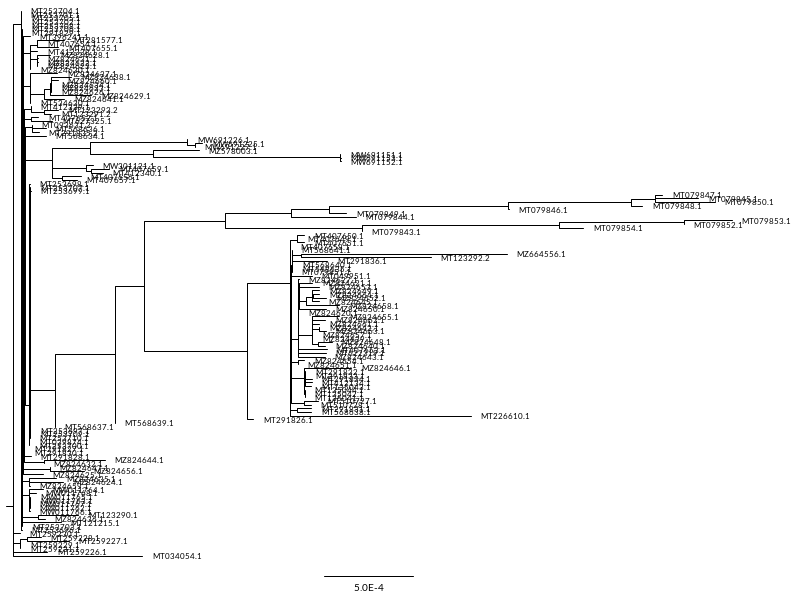

In [34]:
from IPython.display import Image
Image("sum_tree.png")

In [38]:
!figtree sum.tree

javax.swing.UIManager$LookAndFeelInfo[Metal javax.swing.plaf.metal.MetalLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[Nimbus javax.swing.plaf.nimbus.NimbusLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[CDE/Motif com.sun.java.swing.plaf.motif.MotifLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[GTK+ com.sun.java.swing.plaf.gtk.GTKLookAndFeel]
Exception in thread "main" java.awt.HeadlessException: 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.
	at java.desktop/java.awt.GraphicsEnvironment.checkHeadless(GraphicsEnvironment.java:208)
	at java.desktop/java.awt.Window.<init>(Window.java:548)
	at java.desktop/java.awt.Frame.<init>(Frame.java:423)
	at java.desktop/java.awt.Frame.<init>(Frame.java:388)
	at java.desktop/javax.swing.JFrame.<init>(JFrame.java:180)
	at jam.framework.AbstractFrame.<init>(Unknown Source)
	at jam.framework.DocumentFrame.<init>(Unknown Source)
	at figtree.application.FigTreeFrame.<init>(Unknown Source)
	at figtr

In [37]:
!figtree -help


                 FigTree v1.4.4, 2006-2018
                  Tree Figure Drawing Tool
                       Andrew Rambaut

             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk

                 http://tree.bio.ed.ac.uk/
    Uses the Java Evolutionary Biology 2 Library (JEBL2)
                http://jebl2.googlecode.com/
                 Uses the iText PDF Library
                    http://itextpdf.com/
               Uses the Apache Batik Library
            http://xmlgraphics.apache.org/batik/
                 Uses the JDOM XML Library
                    http://www.jdom.org/
 Thanks to Alexei Drummond, Joseph Heled, Philippe Lemey, 
Tulio de Oliveira, Oliver Pybus, Beth Shapiro & Marc Suchard

  Usage: figtree [-graphic <PDF|SVG|PNG|JPEG>] [-width <i>] [-height <i>] [-url] [-help] [<tree-file-name>] [<graphic-file-name>]
    -graphic produce a graphic with the given format
    -width the width of the grap